In [20]:
#import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:
df = pd.read_csv('card_credit_fraud.csv')
df.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,983964,C1231006815,170136,16029636,M1979787155,0,0,0
1,1,1,PAYMENT,186428,C1666544295,21249,1938472,M2044282225,0,0,0
2,2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,4,1,PAYMENT,1166814,C2048537720,41554,2988586,M1230701703,0,0,0


In [12]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [13]:
# Colonnes catégorielles et numériques
categorical_cols = ["type"]
numeric_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [14]:
# Créer la pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),  # Pour les variables numériques
        ("cat", OneHotEncoder(), categorical_cols)  # Pour les variables catégorielles
    ]
)

# Utiliser la pipeline pour prétraiter les données
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Appliquer la pipeline sur les données d'entraînement
X_processed = pipeline.fit_transform(X)

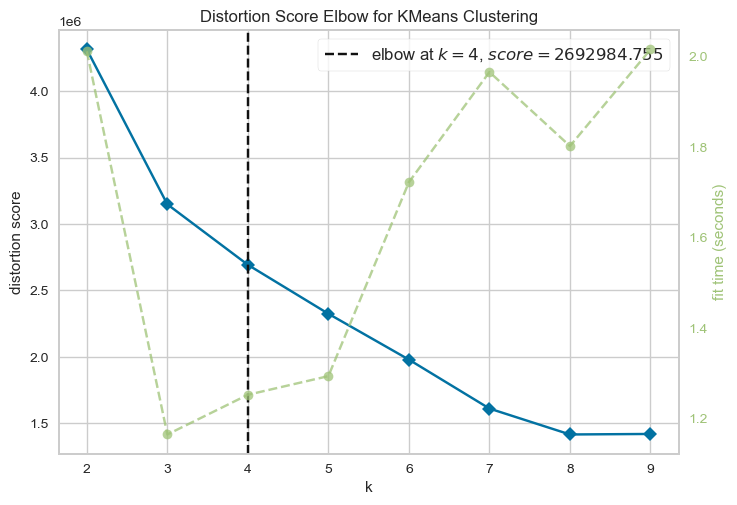

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Utilisation de la méthode Elbow pour déterminer le nombre optimal de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

# Appliquer la méthode sur les données prétraitées
visualizer.fit(X_processed)

# Afficher le graphique Elbow
visualizer.show()

In [25]:
# Initialiser le modèle K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=4)

# Appliquer le modèle aux données prétraitées
kmeans.fit(X_processed)

# Obtenir les étiquettes de cluster pour chaque point de données
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
inertia = kmeans.inertia_
n_iterations = kmeans.n_iter_

# Afficher les étiquettes des clusters
print()
print('Cluster labels : ',cluster_labels)
print()
print('Cluster centers : ',cluster_centers)
print()
print('inertia : ',inertia)
print()
print('number of iteration : ',n_iterations)


Cluster labels :  [1 1 1 ... 3 0 3]

Cluster centers :  [[ 1.99753016e-01 -1.46319107e-01 -1.42885559e-01 -3.63361790e-02
  -1.06571812e-02  2.79604123e-01  5.88380887e-01  4.52547106e-03
   7.17592652e-13  1.27489519e-01]
 [-4.73663388e-01 -2.49091936e-01 -2.52800008e-01 -4.03030321e-01
  -4.38721304e-01 -3.24934524e-13 -1.40887302e-13  1.04413802e-02
   9.86818132e-01  2.74048832e-03]
 [-3.20883601e-02  3.85300916e+00  3.85743316e+00  1.83201902e-01
   8.23473337e-02  9.96529353e-01  1.13419835e-04  7.01695646e-16
   5.89783141e-04  2.76744397e-03]
 [ 1.02263651e+00 -1.12691593e-02 -3.49707075e-02  3.59162782e+00
   3.62218230e+00  2.52656864e-01  4.91726112e-01  7.78861552e-03
  -7.39963646e-14  2.47828408e-01]]

inertia :  2692984.4584513493

number of iteration :  39
